## 機器學習_分類_決策樹(Decision Trees)
#### 資料來源 參考文件
#### https://bangqu.com/23nCkD.html?fbclid=IwAR3TV3jzBnN7Eb9yu4YO093RxAhGgGD_0JXuC2hvxJ_FlR6t3zyBfeOTtyQ
#### https://blog.csdn.net/c406495762/article/details/75663451
#### https://github.com/Jack-Cherish/Machine-Learning
#### https://zhuanlan.zhihu.com/p/85731206

假如現在你需要借一筆錢，那銀行怎麼知道你將來是否會還錢呢？沒法確定。但是銀行有很多歷史借款人的檔案，他們擁有諸如「年齡」、「受教育程度」、「職業」、「薪水」以及——最重要的——「是否還錢」這些資料。

利用這些資料，我們可以訓練機器找到其中的模式並得出答案。找出答案並不成問題，問題在於銀行不能盲目相信機器給出的答案。如果系統出現故障、遭遇黑客攻擊或者喝高了的畢業生剛給系統打了個應急補丁，該怎麼辦？

要處理這個問題，我們需要用到決策樹(Decision Trees)，所有資料自動劃分爲「是/否」式提問——比如「借款人收入是否超過128.12美元？」——聽起來有點反人類。不過，機器生成這樣的問題是爲了在每個步驟中對資料進行最優劃分。

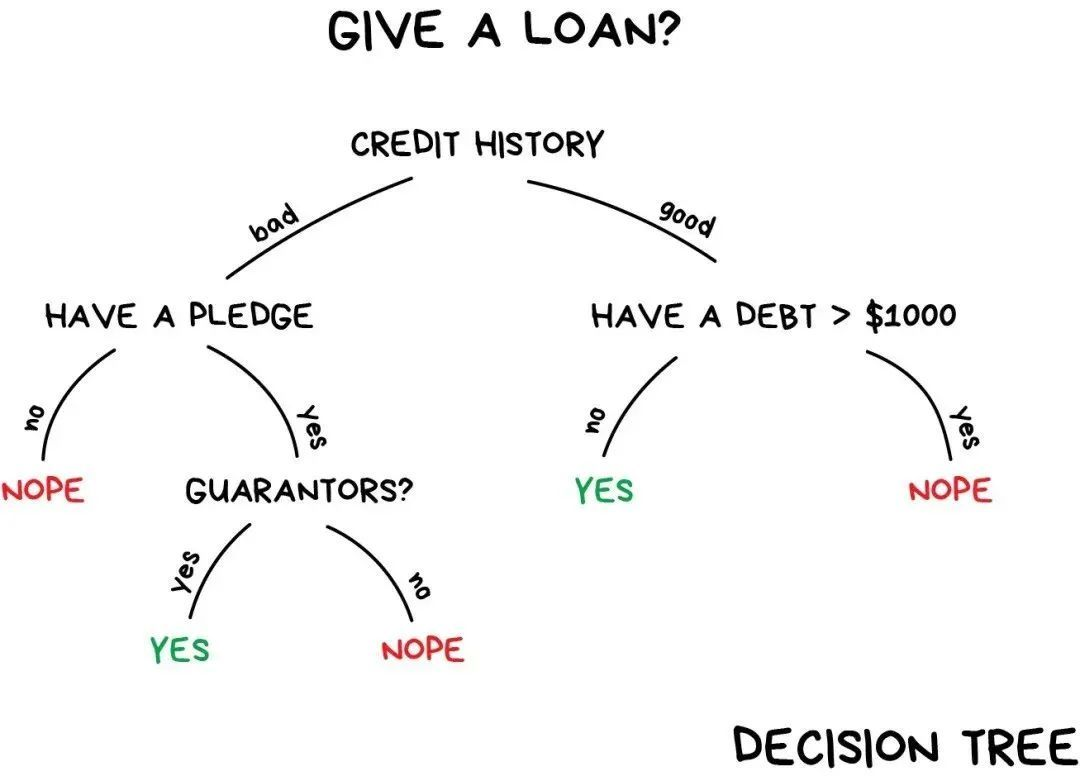

「樹」就是這樣產生的。分支越高(接近根節點)，問題的範圍就越廣。所有分析師都能接受這種做法並在事後給出解釋，即使他並不清楚演算法是怎麼回事，照樣可以很容易地解釋結果

決策樹廣泛應用於高責任場景：診斷、醫藥以及金融領域。

最廣為人知的兩種決策樹演算法是 CART 和 C4.5.

#### 資料來源 參考文件
https://jamleecute.web.app/decision-tree-cart-%E6%B1%BA%E7%AD%96%E6%A8%B9/

https://gist.github.com/yehjames

https://www.jiqizhixin.com/articles/2020-06-11-6

https://python.freelycode.com/contribution/detail/473

https://www.itheima.com/news/20210916/175802.html

 https://aws.amazon.com/tw/what-is/overfitting/

決策樹是一種有監督的機器學習算法，該方法可以用於解決分類和回歸問題。決策樹可以簡單地理解為達到某一特定結果的一系列決策。
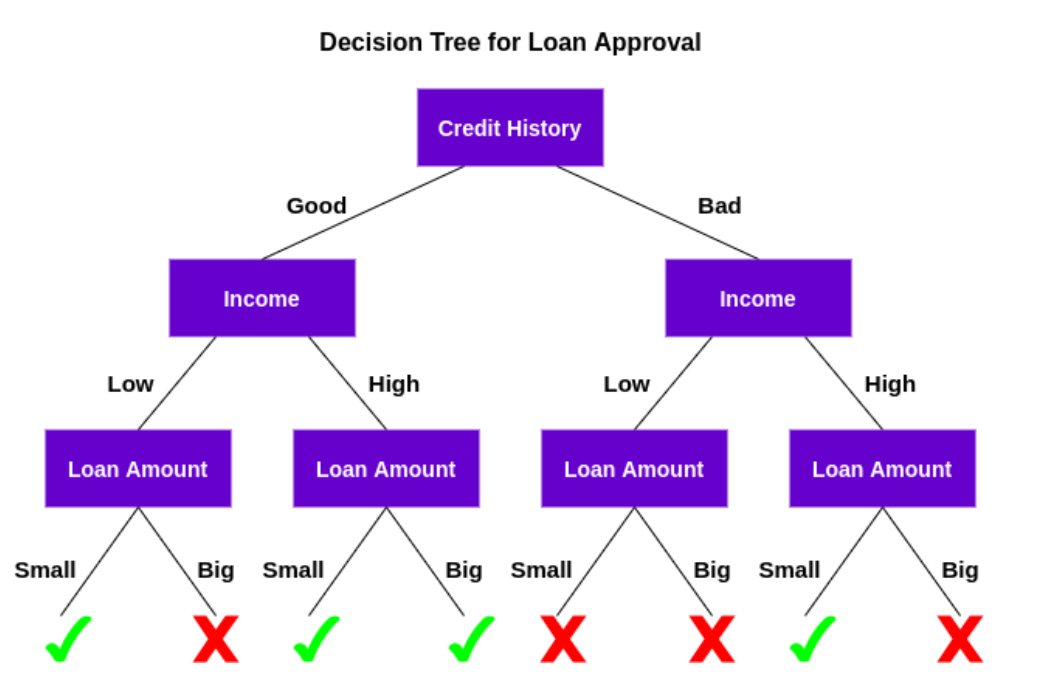

先檢查顧客是否有良好的信用歷史。然後，檢查顧客的收入，最後，檢查顧客申請的貸款額度。基於這三種特徵的檢測，決策樹會決定是否通過顧客的貸款申請

## A.决策樹設計會碰到的問題
### 1.决策樹檢測特徵的先後次序如何安排的?
### 2.如何決定依據何種特徵資料來分裂(產生子節點/幾個子節點)或應該選用何種特徵資料？

#### 這些都會影響這棵決策樹的準確性

### 而分裂產生的子節點，是要選擇能產生最多同質性節點(能把同一性質/同一類的資料集中放在一起的分裂節點方式)
### Ex: 比如 學生資料節點,依據學生性別 分為 男生 及女生兩個子節點的方式 比 依據 班級 分子節點的方式好,
###   因為依據學生性別產生的子節點，其資料有最高同質性


## 依據什麼方式來安排決定產生何種子節點? 可使用如 基尼係數或信息增益等方法來決定

## 基尼係數(Gini coefficient)
### 基尼係數表示，如果我們從樣本隨機選擇兩個項，它們一定是同一類的，那麼樣本的純度可能是1。
####    1.它對分類目標變量“成功”或“失敗”可用。
####    2.它只執行二元分裂。
####    3.基尼係數越高，同質性越高。

### 計算分裂的基尼係數的步驟

####    1.計算子節點的基尼係數，使用公式成功概率平方和失敗概率平方的總和（p^2+q^2）。
####    2.計算分裂的基尼係數，使用該分割的每個節點的加權基尼得分。
#### 舉例：我們想基於目標變量（打板球與否）分開學生。在下面的圖片，我們使用性別和班級兩個輸入變量分開人口。現在，使用基尼係數確定哪個分割產生的同質子節點最多。
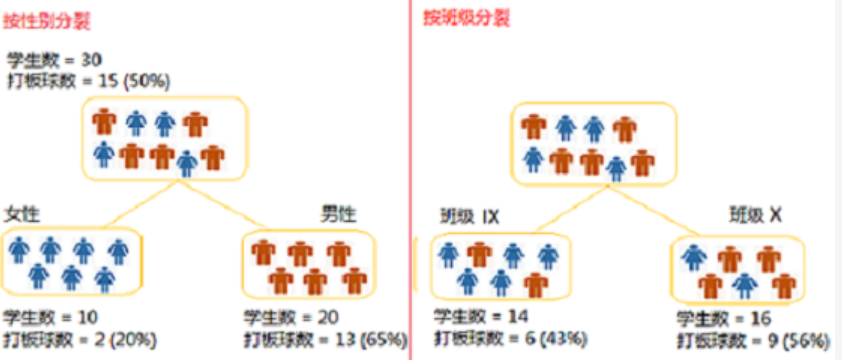

### 按性別分：
####    1.計算，女性子節點的基尼係數 = (0.2)*(0.2)+(0.8)*(0.8)=0.68
####    2.男性子節點的基尼係數 = (0.65)*(0.65)+(0.35)*(0.35)=0.55
####    3.計算按性別分的加權基尼係數  = (10/30)*0.68+(20/30)*0.55=0.59
### 按班級分：
####    1.IX班級子節點的基尼係數  = (0.43)*(0.43)+(0.57)*(0.57)=0.51
####    2.X班級子節點的基尼係數  =  (0.56)*(0.56)+(0.44)*(0.44)=0.51
####    3.計算按班級分的加權基尼係數 = (14/30)*0.51+(16/30)*0.51=0.51
### 上述，可以看到按性別分裂的基尼分數高於按班級分裂，因此，該節點分裂將採用性別。

## 信息增益：
### 如果節點的樣本資料不完全同質，我們需要較多的信息來描述它。如果樣本資料完全同質，我們就可單純描述。
### 所以就可用信息理論中的熵（entropy）（ㄕㄤ） 來計算。熵就是混亂的程度，信息越多越亂叫做「熵增」、信息越少越有條理則是「熵減」
### 如果信息樣本完全同質，那麼熵是零，如果樣本同樣劃分（50%/50%），熵是一。
### 熵可以用公式計算:



#### 這裡p和q分別是該節點成功和失敗的概率。熵也用於分類目標變量。它選擇與父節點和其它分裂相比，具有最低熵的分裂。熵越小，越好。
### 計算分裂的熵的步驟：
####    1.計算父節點的熵
####    2.計算分裂的每個節點的熵併計算分裂中所有可用子節點的加權平均值。
#### 舉例：學生的例子讓我們使用這個方法來確定最佳的分割。
####    1.父節點的熵= -(15/30) log2 (15/30) – (15/30) log2 (15/30) = 1。此處1顯示它不是一個純淨的節點。
####    2.女性節點的熵 = -(2/10) log2 (2/10) – (8/10) log2 (8/10) = 0.72，男性節點的熵 -(13/20) log2 (13/20) – (7/20) log2 (7/20) = 0.93
####    3.按性別分裂的熵 = 子節點的加權熵 = (10/30)*0.72 + (20/30)*0.93 = 0.86
####    4.班級IX節點的熵，-(6/14) log2 (6/14) – (8/14) log2 (8/14) = 0.99，班級X節點的熵，-(9/16) log2 (9/16) – (7/16) log2 (7/16) = 0.99。
####    5.按班級分裂的熵 =  (14/30)*0.99 + (16/30)*0.99 = 0.99
### 上述，可以看到，按性別分裂熵最低，所以該樹將會按性別分裂。我們可以從熵中得到信息增益為1(父節點的熵)-熵。
## 所以什麼是信息增益呢？
### 在劃分數據集之前之後信息發生的變化輛為信息增益，知道如何計算信息增益，就可以計算每個特徵值劃分數據集獲得的信息增益，獲得信息增益最高(1-熵)的特徵就是最好的選擇。
### 信息增益 = entroy(前) - entroy(后)
### 信息增益越大表示使用某特徵  來劃分所獲得的 資料集 “純度提升越大”。

## B.决策樹的產生
### 流程如下：
#### 1.得到原始數據集，然後計算找出最好的特徵屬性 來劃分數據集。
#### 2.第一次劃分之後，數據集被向下傳遞到樹的分支的下一個節點。在這個節點上，再次計算找出最好的特徵屬性來劃分數據。
#### 3.遞歸的往下處理數據集，直到不能繼續下去為止。。

### 構建決策樹(劃分數據集)的算法很多，比如C4.5、ID3和CART。
### ID3 使用的分類(劃分)標準是信息增益
### CART（Classfication And Regression Tree 分類回歸樹）採用二分遞歸分割的技術將當前樣本集分為兩個子樣本集，分類使用基尼係數
### C4.5 引入信息增益率(gain ratio)  來作為分類標準。增益率是用前面的信息增益Gain(D, a)和属性a对应的"固有值"(intrinsic value)
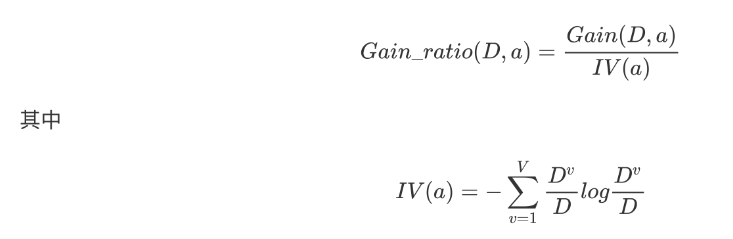

### 舉例:信息增益率(gain ratio)計算範例

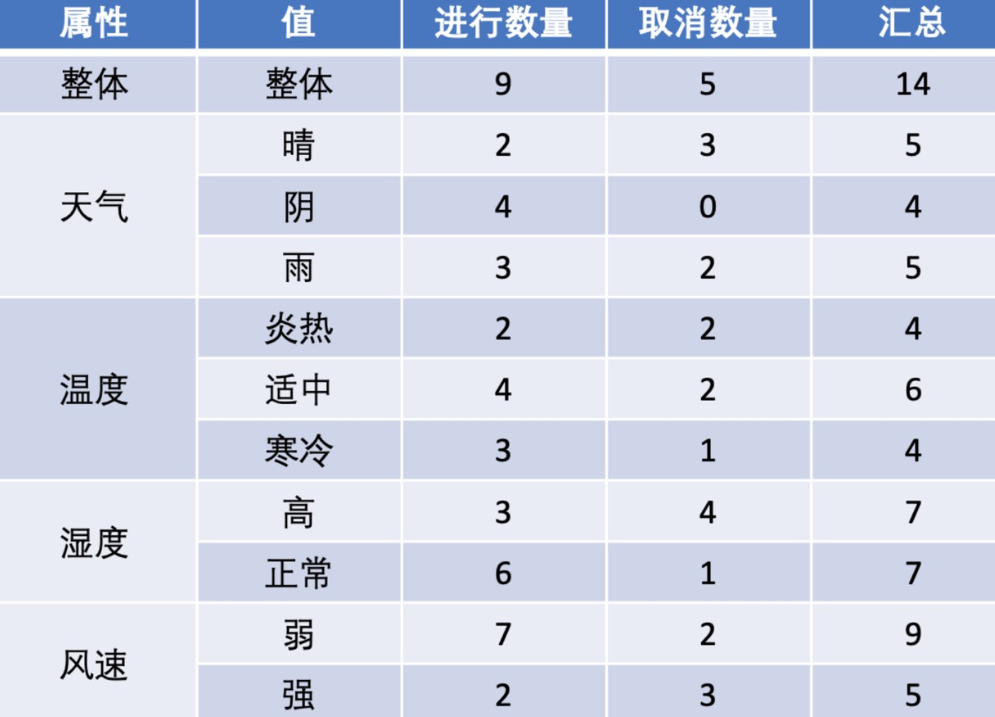

#### a.計算所有樣本資料集的信息熵
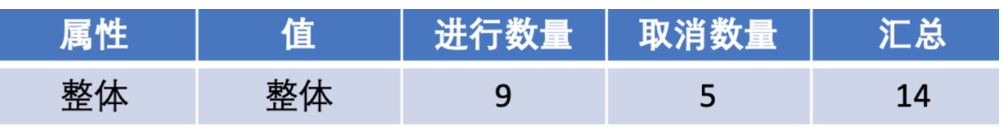

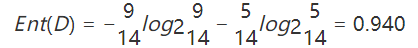

#### b.計算每個特徵屬性的信息熵
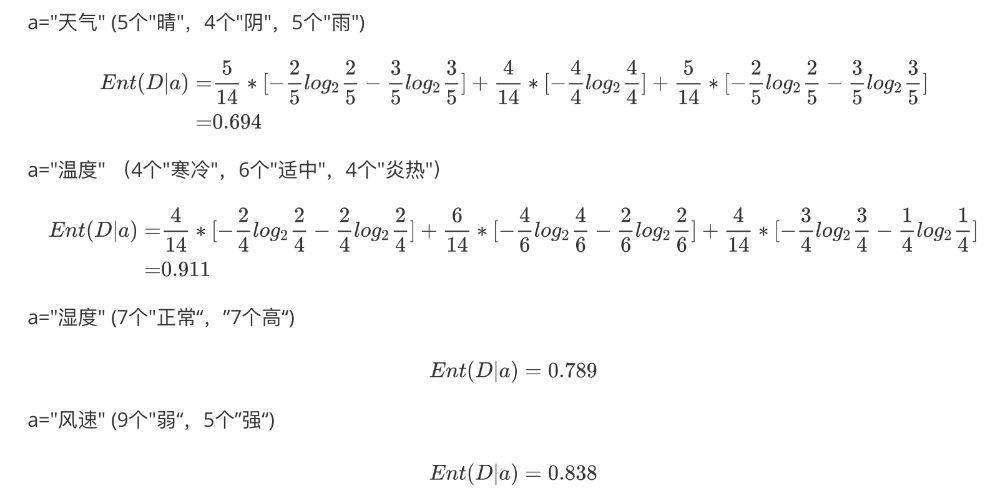

#### c.計算每個特徵屬性的信息增益
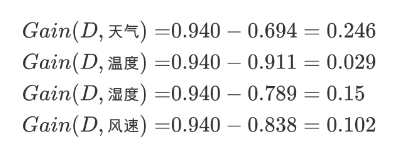

#### d.計算每個特徵屬性的IV
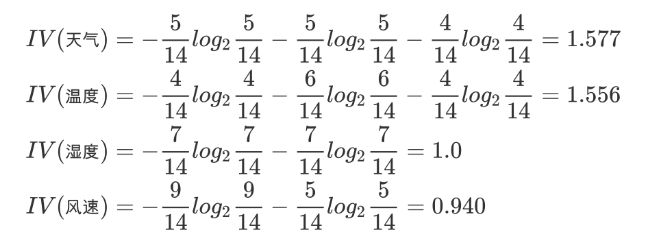

#### e.計算每個特徵屬性的信息增益率
#### 天氣: 0.246/1.577=0.1559; 溫度:0.029/1.556=0.0186;濕度:0.15/1=0.15;風速:0.102/0.94=0.1085
#### 天氣的信息增益率最高，優先選擇天氣為分裂屬性

## C.决策樹生成的問題
### 如果沒有限制決策樹的生成,可能會發生 過度擬合，
### <li>什麼是過度擬合？
#### 過度擬合是一種不理想的機器學習行為，當機器學習模型 只對提供的訓練資料做出準確的預測，對新的資料無法提供準確的預測時，就會發生此行為現象。
### <li> 為什麼會發生過度擬合？
#### 過度擬合是由於以下幾個原因而發生的，例如：
#### •    訓練資料大小太小，且不含足夠的資料範例，無法準確呈現所有可能的輸入資料值。
#### •    訓練資料包含大量不相關的資訊，稱為雜訊資料。
#### •    模型在單一範例資料集上訓練時間過長。
#### •    模型複雜度較高，因此可以學習到訓練資料中的雜訊。
### <li> 如何偵測過度擬合？
#### 偵測過度擬合模型的最佳方法是在更多資料上測試機器學習模型，並全面呈現可能的輸入資料值和類型。
#### 通常，訓練資料的一部分用作測試資料，以檢查過度擬合。測試資料若出現高錯誤率就表示過度擬合。
#### 測試過度擬合的其中一種方法:K 折交叉驗證
#### 將訓練集分為 K 個相等大小的子集或稱為折的範例集。訓練程序包含一系列反覆運作。在每次反覆運作中，步驟如下：
#### 1.    保留一個子集作為驗證資料，並在剩餘的 K-1 子集上訓練機器學習模型。
#### 2.    觀察模型在驗證範例上的執行方式。
#### 3.    根據輸出資料品質對模型效能進行評分。
#### 重複執行反覆運作，直至您在每個範例集上測試模型。然後，您可以對所有反覆運作的評分求平均值，以取得預測模型的最終評定。
### <li> 如何防止過度擬合？
#### 可以透過多樣化和擴展訓練資料集，或者使用一些策略 (如下所示策略)，來防止過度擬合。
#### 1.提前停止
#### 在機器學習模型學習資料中的雜訊之前，提前停止會暫停訓練階段。然而，把握好時機很重要；否則模型仍然無法提供準確的結果。
#### 2.剪除
#### 建置模型時，識別影響最終預測的若干特徵或參數。特徵選擇 (或剪除) 可識別訓練集內最重要的特徵，並排除不相關的特徵。
#### 例如，若要預測影像是動物還是人類，可以查看各種輸入參數，例如臉部形狀，耳朵位置，身體結構等。您可以優先考慮臉部形狀並忽略眼睛的形狀。
#### 3.正規化
#### 正規化是尋求減少過度擬合的訓練/最佳化技術的集合。這些方法根據重要性對特徵進行分級，藉此嘗試消除那些不會影響預測結果的因素。
#### 例如，數學計算會將懲罰值套用至影響最小的特徵。假設一個統計模型嘗試預測一座城市在 20 年後的住房價格。正規化會對人口增長和平均年收入等特#### 徵賦予較低懲罰值，但對城市年平均溫度則賦予較高懲罰值。
#### 4.整合
#### 將多個單獨的機器學習演算法(預測模型)相結合。有些模型被稱為弱學習者，因為其結果往往不準確。整合法結合所有弱學習者，以取得更準確的結果。#### 使用多個模型來分析範例資料，並選擇最準確的結果。兩種主要的整合方法是套袋法和提升法。提升法會一個接一個地訓練不同的機器學習模型，以取得最終結果，而套袋法則會平行訓練這些模型。
#### 5.資料增強
#### 資料增強是一種機器學習技術，每次模型處理範例資料時，都會對其稍做變更。您可以透過較小地變更輸入資料來實現。在審核中完成後，資料增強會使訓練集在模型中看起來是唯一的，並防止模型學習其特徵。例如，將平移、翻轉和旋轉等轉換套用至輸入影像。

### <li> 什麼是擬合不足？
#### 擬合不足是指當模型無法判斷輸入與輸出資料間有何意義與關係時，發生的另一種錯誤類型。
#### 比如 有大量的訓練資料,但沒有給模型有適當的時間長度來訓練，就會得到擬合不足的模型。
### <li> 擬合不足與過度擬合
#### 擬合不足模型會出現較高的預測錯誤偏差，會為訓練資料和測試集提供不正確的結果(訓練不足)。
#### 過度擬合模型會出現較高的預測結果差異，會對訓練集提供準確的預測結果，但會對測試集提供不準確的預測結果。模型訓練越多(過度訓練)，導致的差異可能會增加。
### 所以在訓練模型時，要尋找擬合不足與過度擬合間的最佳位置(時機點)。
### 因此，決策樹建模時阻止過度擬合可以通過2種方式：
####    1.限制樹的大小:限制節點數
####    2.剪枝: 刪除決策節點的子節點


### <li> 限制樹的大小方法:
#### 1.設定要分裂節點所需的最少樣本數（或觀測值）。
#### 2.設定終端節點（葉）的最少樣本數
#### 3.設定樹的最大深度（垂直深度） 
#### 4.設定終端節點的最大數量(個數)
#### 5.考慮分割的最大特徵數
### <li> 剪枝策略:
#### 1.預剪枝:在節點劃分前來確定是否繼續增長，及早停止增長的主要方法有：
#### •節點內數據樣本低於某一閾值；
#### •所有節點特徵都已分裂；
#### •節點劃分前準確率比劃分後準確率高。    
#### 2.後剪枝:在已經生成的決策樹上進行剪枝，從而得到簡化版的剪枝後的決策樹。
#### •用遞歸的方式從低往上針對每一個非葉子節點，評估用一個最佳葉子節點去代替這棵子樹是否有益。
#### 如果剪枝後與剪枝前相比其錯誤率是保持或者下降，則這棵子樹就可以被替換掉。
 

d:\Users\hgtma\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Users\hgtma\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Users\hgtma\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24049 (\N{CJK UNIFIED IDEOGRAPH-5DF1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Users\hgtma\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Users\hgtma\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 25151 (\N{CJK UNIFIED IDEOGRAPH-623F}) missing from current font.
  fig.canvas.print_figure(bytes_

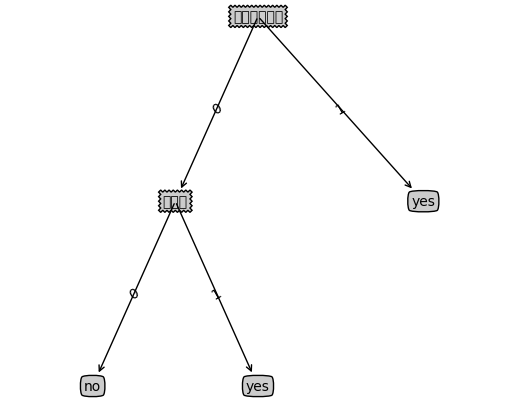

放贷


In [4]:
# -*- coding: UTF-8 -*-
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
from math import log
import operator
import pickle

"""
函数说明:计算给定数据集的经验熵(香农熵)

Parameters:
	dataSet - 数据集
Returns:
	shannonEnt - 经验熵(香农熵)
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-24
"""
def calcShannonEnt(dataSet):
	numEntires = len(dataSet)						#返回数据集的行数
	labelCounts = {}								#保存每个标签(Label)出现次数的字典
	for featVec in dataSet:							#对每组特征向量进行统计
		currentLabel = featVec[-1]					#提取标签(Label)信息
		if currentLabel not in labelCounts.keys():	#如果标签(Label)没有放入统计次数的字典,添加进去
			labelCounts[currentLabel] = 0
		labelCounts[currentLabel] += 1				#Label计数
	shannonEnt = 0.0								#经验熵(香农熵)
	for key in labelCounts:							#计算香农熵
		prob = float(labelCounts[key]) / numEntires	#选择该标签(Label)的概率
		shannonEnt -= prob * log(prob, 2)			#利用公式计算
	return shannonEnt								#返回经验熵(香农熵)

"""
函数说明:创建测试数据集

Parameters:
	无
Returns:
	dataSet - 数据集
	labels - 特征标签
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-20
"""
def createDataSet():
	dataSet = [[0, 0, 0, 0, 'no'],						#数据集
			[0, 0, 0, 1, 'no'],
			[0, 1, 0, 1, 'yes'],
			[0, 1, 1, 0, 'yes'],
			[0, 0, 0, 0, 'no'],
			[1, 0, 0, 0, 'no'],
			[1, 0, 0, 1, 'no'],
			[1, 1, 1, 1, 'yes'],
			[1, 0, 1, 2, 'yes'],
			[1, 0, 1, 2, 'yes'],
			[2, 0, 1, 2, 'yes'],
			[2, 0, 1, 1, 'yes'],
			[2, 1, 0, 1, 'yes'],
			[2, 1, 0, 2, 'yes'],
			[2, 0, 0, 0, 'no']]
	labels = ['年龄', '有工作', '有自己的房子', '信贷情况']		#特征标签
	return dataSet, labels 							#返回数据集和分类属性

"""
函数说明:按照给定特征划分数据集

Parameters:
	dataSet - 待划分的数据集
	axis - 划分数据集的特征
	value - 需要返回的特征的值
Returns:
	无
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-24
"""
def splitDataSet(dataSet, axis, value):		
	retDataSet = []										#创建返回的数据集列表
	for featVec in dataSet: 							#遍历数据集
		if featVec[axis] == value:
			reducedFeatVec = featVec[:axis]				#去掉axis特征
			reducedFeatVec.extend(featVec[axis+1:]) 	#将符合条件的添加到返回的数据集
			retDataSet.append(reducedFeatVec)
	return retDataSet		  							#返回划分后的数据集

"""
函数说明:选择最优特征

Parameters:
	dataSet - 数据集
Returns:
	bestFeature - 信息增益最大的(最优)特征的索引值
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-20
"""
def chooseBestFeatureToSplit(dataSet):
	numFeatures = len(dataSet[0]) - 1					#特征数量
	baseEntropy = calcShannonEnt(dataSet) 				#计算数据集的香农熵
	bestInfoGain = 0.0  								#信息增益
	bestFeature = -1									#最优特征的索引值
	for i in range(numFeatures): 						#遍历所有特征
		#获取dataSet的第i个所有特征
		featList = [example[i] for example in dataSet]
		uniqueVals = set(featList)     					#创建set集合{},元素不可重复
		newEntropy = 0.0  								#经验条件熵
		for value in uniqueVals: 						#计算信息增益
			subDataSet = splitDataSet(dataSet, i, value) 		#subDataSet划分后的子集
			prob = len(subDataSet) / float(len(dataSet))   		#计算子集的概率
			newEntropy += prob * calcShannonEnt(subDataSet) 	#根据公式计算经验条件熵
		infoGain = baseEntropy - newEntropy 					#信息增益
		# print("第%d个特征的增益为%.3f" % (i, infoGain))			#打印每个特征的信息增益
		if (infoGain > bestInfoGain): 							#计算信息增益
			bestInfoGain = infoGain 							#更新信息增益，找到最大的信息增益
			bestFeature = i 									#记录信息增益最大的特征的索引值
	return bestFeature 											#返回信息增益最大的特征的索引值


"""
函数说明:统计classList中出现此处最多的元素(类标签)

Parameters:
	classList - 类标签列表
Returns:
	sortedClassCount[0][0] - 出现此处最多的元素(类标签)
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-24
"""
def majorityCnt(classList):
	classCount = {}
	for vote in classList:										#统计classList中每个元素出现的次数
		if vote not in classCount.keys():classCount[vote] = 0	
		classCount[vote] += 1
	sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)		#根据字典的值降序排序
	return sortedClassCount[0][0]								#返回classList中出现次数最多的元素

"""
函数说明:创建决策树

Parameters:
	dataSet - 训练数据集
	labels - 分类属性标签
	featLabels - 存储选择的最优特征标签
Returns:
	myTree - 决策树
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-25
"""
def createTree(dataSet, labels, featLabels):
	classList = [example[-1] for example in dataSet]			#取分类标签(是否放贷:yes or no)
	if classList.count(classList[0]) == len(classList):			#如果类别完全相同则停止继续划分
		return classList[0]
	if len(dataSet[0]) == 1 or len(labels) == 0:									#遍历完所有特征时返回出现次数最多的类标签
		return majorityCnt(classList)
	bestFeat = chooseBestFeatureToSplit(dataSet)				#选择最优特征
	bestFeatLabel = labels[bestFeat]							#最优特征的标签
	featLabels.append(bestFeatLabel)
	myTree = {bestFeatLabel:{}}									#根据最优特征的标签生成树
	del(labels[bestFeat])										#删除已经使用特征标签
	featValues = [example[bestFeat] for example in dataSet]		#得到训练集中所有最优特征的属性值
	uniqueVals = set(featValues)								#去掉重复的属性值
	for value in uniqueVals:									#遍历特征，创建决策树。
		subLabels = labels[:]
		myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels, featLabels)
        
	return myTree

"""
函数说明:获取决策树叶子结点的数目

Parameters:
	myTree - 决策树
Returns:
	numLeafs - 决策树的叶子结点的数目
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-24
"""
def getNumLeafs(myTree):
    numLeafs = 0												#初始化叶子
    firstStr = next(iter(myTree))								#python3中myTree.keys()返回的是dict_keys,不在是list,所以不能使用myTree.keys()[0]的方法获取结点属性，可以使用list(myTree.keys())[0]
    secondDict = myTree[firstStr]								#获取下一组字典
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':				#测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs

"""
函数说明:获取决策树的层数

Parameters:
	myTree - 决策树
Returns:
	maxDepth - 决策树的层数
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-24
"""
def getTreeDepth(myTree):
    maxDepth = 0												#初始化决策树深度
    firstStr = next(iter(myTree))								#python3中myTree.keys()返回的是dict_keys,不在是list,所以不能使用myTree.keys()[0]的方法获取结点属性，可以使用list(myTree.keys())[0]
    secondDict = myTree[firstStr]								#获取下一个字典
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':				#测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth			#更新层数
    return maxDepth

"""
函数说明:绘制结点

Parameters:
	nodeTxt - 结点名
	centerPt - 文本位置
	parentPt - 标注的箭头位置
	nodeType - 结点格式
Returns:
	无
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-24
"""
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
	arrow_args = dict(arrowstyle="<-")											#定义箭头格式
	font = FontProperties(fname=r"c:\windows\fonts\simsunb.ttf", size=14)		#设置中文字体
	createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',	#绘制结点
		xytext=centerPt, textcoords='axes fraction',
		va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)

"""
函数说明:标注有向边属性值

Parameters:
	cntrPt、parentPt - 用于计算标注位置
	txtString - 标注的内容
Returns:
	无
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-24
""" 
def plotMidText(cntrPt, parentPt, txtString):
	xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]											#计算标注位置					
	yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
	createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

"""
函数说明:绘制决策树

Parameters:
	myTree - 决策树(字典)
	parentPt - 标注的内容
	nodeTxt - 结点名
Returns:
	无
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-24
""" 
def plotTree(myTree, parentPt, nodeTxt):
	decisionNode = dict(boxstyle="sawtooth", fc="0.8")										#设置结点格式
	leafNode = dict(boxstyle="round4", fc="0.8")											#设置叶结点格式
	numLeafs = getNumLeafs(myTree)  														#获取决策树叶结点数目，决定了树的宽度
	depth = getTreeDepth(myTree)															#获取决策树层数
	firstStr = next(iter(myTree))															#下个字典     											
	cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)	#中心位置
	plotMidText(cntrPt, parentPt, nodeTxt)													#标注有向边属性值
	plotNode(firstStr, cntrPt, parentPt, decisionNode)										#绘制结点
	secondDict = myTree[firstStr]															#下一个字典，也就是继续绘制子结点
	plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD										#y偏移
	for key in secondDict.keys():								
		if type(secondDict[key]).__name__=='dict':											#测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
			plotTree(secondDict[key],cntrPt,str(key))        								#不是叶结点，递归调用继续绘制
		else:																				#如果是叶结点，绘制叶结点，并标注有向边属性值 											
			plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
			plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
			plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
	plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

"""
函数说明:创建绘制面板

Parameters:
	inTree - 决策树(字典)
Returns:
	无
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-24
""" 
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')													#创建fig
    fig.clf()																				#清空fig
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    							#去掉x、y轴
    plotTree.totalW = float(getNumLeafs(inTree))											#获取决策树叶结点数目
    plotTree.totalD = float(getTreeDepth(inTree))											#获取决策树层数
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;								#x偏移
    plotTree(inTree, (0.5,1.0), '')															#绘制决策树
    plt.show()																				#显示绘制结果

"""
函数说明:使用决策树分类

Parameters:
	inputTree - 已经生成的决策树
	featLabels - 存储选择的最优特征标签
	testVec - 测试数据列表，顺序对应最优特征标签
Returns:
	classLabel - 分类结果
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-25
""" 
def classify(inputTree, featLabels, testVec):
	firstStr = next(iter(inputTree))														#获取决策树结点
	secondDict = inputTree[firstStr]														#下一个字典
	featIndex = featLabels.index(firstStr)												
	for key in secondDict.keys():
		if testVec[featIndex] == key:
			if type(secondDict[key]).__name__ == 'dict':
				classLabel = classify(secondDict[key], featLabels, testVec)
			else: classLabel = secondDict[key]
	return classLabel

"""
函数说明:存储决策树

Parameters:
	inputTree - 已经生成的决策树
	filename - 决策树的存储文件名
Returns:
	无
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-25
""" 
def storeTree(inputTree, filename):
	with open(filename, 'wb') as fw:
		pickle.dump(inputTree, fw)

"""
函数说明:读取决策树

Parameters:
	filename - 决策树的存储文件名
Returns:
	pickle.load(fr) - 决策树字典
Author:
	Jack Cui
Blog:
	http://blog.csdn.net/c406495762
Modify:
	2017-07-25
""" 
def grabTree(filename):
	fr = open(filename, 'rb')
	return pickle.load(fr)


if __name__ == '__main__':
	dataSet, labels = createDataSet()
	featLabels = []
	myTree = createTree(dataSet, labels, featLabels)
	createPlot(myTree)
	testVec = [0,1]										#测试数据
	result = classify(myTree, featLabels, testVec)
	if result == 'yes':
		print('放贷')
	if result == 'no':
		print('不放贷')